In [1]:
!gdown --id 1yhGmBvOADs1Qzry8clonWlepbGkOj-PO
!unzip week4_assets.zip -d .

Downloading...
From: https://drive.google.com/uc?id=1yhGmBvOADs1Qzry8clonWlepbGkOj-PO
To: /content/week4_assets.zip
100% 256k/256k [00:00<00:00, 76.6MB/s]
Archive:  week4_assets.zip
  inflating: ./bg2.jpg               
  inflating: ./humans.jpg            
  inflating: ./logo.png              
  inflating: ./person.jpg            
  inflating: ./pizza_bluescreen.jpg  


#Watermark

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
%matplotlib inline

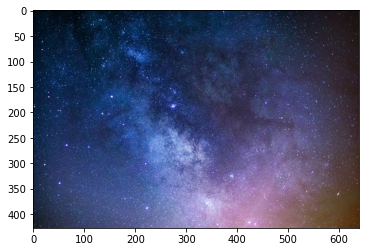

In [3]:
bg = cv2.imread("bg2.jpg")
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
plt.imshow(bg)

In [4]:
watermark = cv2.imread("logo.png", -1)
wh,ww, wc = watermark.shape


print(watermark.shape)

(55, 114, 4)


(427, 640, 4)


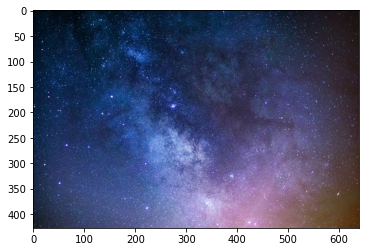

In [5]:
(h, w, c) = bg.shape
image = np.dstack([bg, np.full((h, w), 255)])
print(image.shape)
plt.imshow(image)

In [6]:
x1, y1 = 20, 20
x2, y2 = x1 + ww, y1 + wh

overlay = np.zeros_like(image)
overlay[y1:y2, x1:x2] = watermark

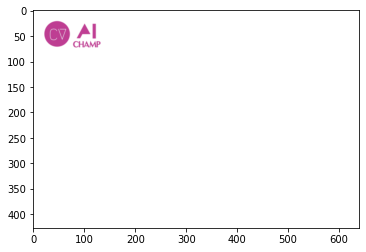

In [7]:
plt.imshow(overlay)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


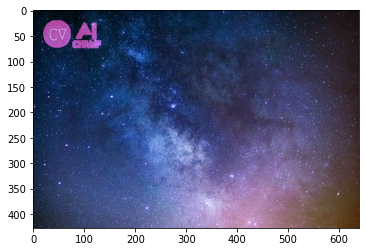

In [8]:
combined = image.copy()
combined = cv2.addWeighted(overlay, 0.9, combined, 1.0, 0.0)

plt.imsave("wt.png", combined.astype("uint8"))
plt.imshow(combined)